# **Synthetic error from catalog**

A demonstration notebook that allows generating photometric errors randomly distributed over the observed magnitudes, from empirical probability functions created using a catalog of observations.

## 1. **Initialization**

### 1.1 Import packages

In [13]:
from importlib import reload
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS

sys.path.append(os.path.abspath(os.path.join(os.getcwd(),"../")))

from src import photometry_plots as pp
from src import photometry_errors as pe; reload(pe)
# %matplotlib widget
%matplotlib inline

### 1.2 Load source catalog

In [2]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

In [3]:
### Example with LSST DP1 ECDFS ###
dp1_ECDFS = pd.read_csv(f"{base_dir}/data/DP1_ECDFS_photometry.csv")
# dp1_ECDFS

### 1.3 Load maglim maps

Corresponding bands must be specified 

In [4]:
### Retrieve magmap list ###
mag_lim_folder = os.path.join(base_dir, 'data/maglim_maps')
mag_maps_file_list = [os.path.join(mag_lim_folder,f) for f in os.listdir(mag_lim_folder) 
                        if f.endswith('.fits')]

### Define band list ###
band_list = ["u","g","r","i","z","y"]

### Build magmap dict ###
mag_maps_file_dict = {}
for band, f in zip(band_list, mag_maps_file_list):
    try:
        if f.endswith('.fits'):
            mag_maps_file_dict[band] = f
    except:
        continue

mag_maps_file_dict

{'u': '/home/hallouin/Documents/t_hall/LSST_photometry/data/maglim_maps/ECDFS_maglim_u.fits',
 'g': '/home/hallouin/Documents/t_hall/LSST_photometry/data/maglim_maps/ECDFS_maglim_g.fits',
 'r': '/home/hallouin/Documents/t_hall/LSST_photometry/data/maglim_maps/ECDFS_maglim_r.fits',
 'i': '/home/hallouin/Documents/t_hall/LSST_photometry/data/maglim_maps/ECDFS_maglim_z.fits',
 'z': '/home/hallouin/Documents/t_hall/LSST_photometry/data/maglim_maps/ECDFS_maglim_i.fits',
 'y': '/home/hallouin/Documents/t_hall/LSST_photometry/data/maglim_maps/ECDFS_maglim_y.fits'}

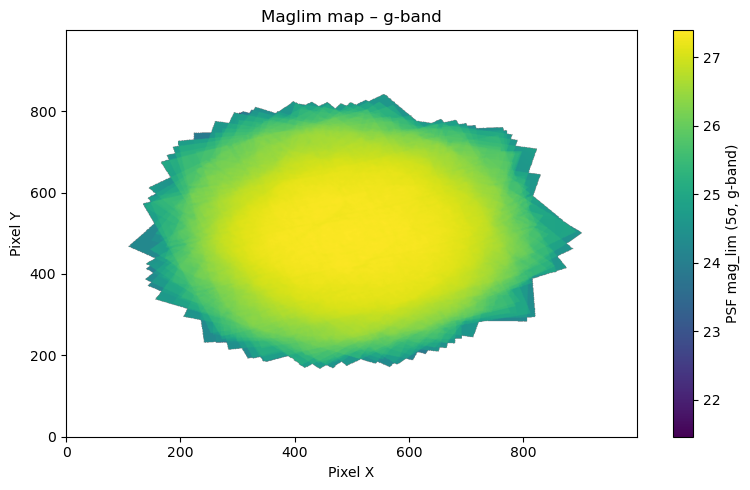

In [5]:
# Initialisation
maglim = pe.DeltaMaps(mag_maps_file_dict)

# see avalaible bands
maglim.bands()

# plot one band
maglim.plot_map("g")

## 2. **Compute $\Delta_{band,i} = mag_{band,i}-mag\_lim_{band,radec(i)}$**

### 2.1 Compute $\Delta$ for each source

In [6]:
# mag columns dict
mag_columns = {
    "u": "u_cModelMag",
    "g": "g_cModelMag",
    "r": "r_cModelMag",
    "i": "i_cModelMag",
    "z": "z_cModelMag",
    "y": "y_cModelMag",
}

# add delta to catalog
cat = maglim.add_delta_to_catalog(dp1_ECDFS, mag_columns, radec_names=["coord_ra","coord_dec"])


In [7]:
list(cat.columns.values)


['objectId',
 'coord_ra',
 'coord_dec',
 'ebv',
 'u_cModelMag',
 'u_cModelMagErr',
 'g_cModelMag',
 'g_cModelMagErr',
 'r_cModelMag',
 'r_cModelMagErr',
 'i_cModelMag',
 'i_cModelMagErr',
 'z_cModelMag',
 'z_cModelMagErr',
 'y_cModelMag',
 'y_cModelMagErr',
 'refExtendedness',
 'g_psfMag',
 'g_psfMagErr',
 'maglim_u',
 'delta_u',
 'maglim_g',
 'delta_g',
 'maglim_r',
 'delta_r',
 'maglim_i',
 'delta_i',
 'maglim_z',
 'delta_z',
 'maglim_y',
 'delta_y']

In [8]:
cat#[['y_cModelMag', 'y_cModelMagErr', 'maglim_y', 'delta_y']]

,objectId,coord_ra,coord_dec,ebv,u_cModelMag,u_cModelMagErr,g_cModelMag,g_cModelMagErr,r_cModelMag,r_cModelMagErr,...,maglim_g,delta_g,maglim_r,delta_r,maglim_i,delta_i,maglim_z,delta_z,maglim_y,delta_y
0,609780902427367286,52.640189,-28.593683,0.008793,NaN,NaN,25.598400,0.865465,23.147100,0.084984,...,25.015072,0.583328,24.688586,-1.541485,23.384652,-1.515452,24.810438,NaN,NaN,NaN
1,609780902427367296,52.703724,-28.592246,0.008917,NaN,NaN,23.680500,0.104268,22.572500,0.044972,...,25.502810,-1.822310,24.701977,-2.129477,23.819433,-2.119832,25.133274,-3.792574,NaN,NaN
2,609780902427367268,52.678693,-28.593094,0.008962,NaN,NaN,23.024099,0.052504,22.347601,0.042550,...,25.420861,-2.396762,24.702005,-2.354404,23.818461,-1.701562,24.946538,-2.744638,NaN,NaN
3,609780902427367336,52.697868,-28.589952,0.008918,23.373800,0.315337,24.011200,0.092970,24.076401,0.102733,...,25.501865,-1.490665,24.701743,-0.625342,23.819529,-0.751729,25.072841,-2.083942,NaN,NaN
4,609780902427367320,52.690968,-28.592232,0.008946,NaN,NaN,23.435600,0.065231,23.151899,0.068609,...,25.501597,-2.065997,24.701613,-1.549713,23.819034,-1.145235,25.019146,-2.286346,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195230,611254522886499009,52.872274,-28.173224,0.009321,25.883699,0.533915,24.715599,0.024462,24.607000,0.027638,...,27.298551,-2.582952,27.020493,-2.413493,25.555959,-1.061759,26.441237,-1.821337,23.584461,0.469140
195231,611254522886499008,52.870371,-28.180464,0.009379,25.868999,0.538733,25.627199,0.052479,25.223700,0.046094,...,27.311231,-1.684032,27.016929,-1.793229,25.546207,-1.006107,26.418410,-1.850911,23.584286,0.908113
195232,611254522886499007,52.862616,-28.170736,0.009244,24.921700,0.243163,24.687000,0.026694,24.468399,0.027778,...,27.275597,-2.588596,27.006339,-2.537940,25.526798,-1.241398,26.390492,-2.289791,23.554693,-0.231092
195233,611254522886499006,52.863998,-28.173702,0.009288,26.255501,0.922656,24.545799,0.026446,24.331800,0.027963,...,27.283792,-2.737993,27.001682,-2.669881,25.521201,-1.733401,26.399024,-3.069323,23.552933,-0.565632


## 3. **Generate probability distribution functions** 

In [10]:
cat = cat[(cat["delta_r"]<-1)&(cat["delta_g"]<-1)&(cat["delta_i"]<-1)]

In [14]:
pem = pe.PhotometricErrorModel()

models = pem.model_collection(x_lists=cat[["delta_r","delta_i","delta_z"]], 
    sigma_lists=cat[["r_cModelMagErr", "i_cModelMagErr", "z_cModelMagErr"]], 
    model_names=["r", "i", "z"])


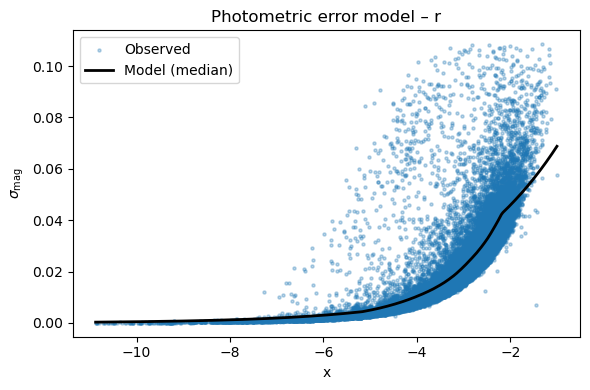

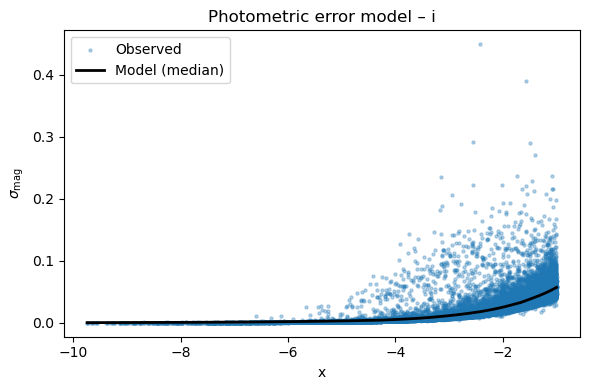

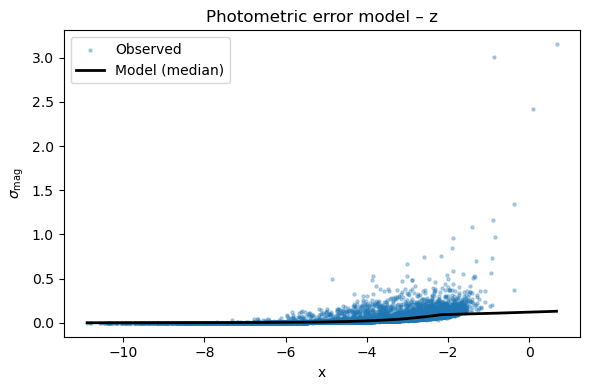

In [15]:
# %matplotlib widget
pem.plot_models(
    models,
    x_lists=cat[["delta_r","delta_i","delta_z"]],
    sigma_lists=cat[["r_cModelMagErr", "i_cModelMagErr", "z_cModelMagErr"]],
    model_names=["r", "i", "z"],
    show_scatter=True,
    show_model=True,
    subsample=20000
)


In [16]:
sigma_sim_r = models["i"].sample(cat["delta_i"])

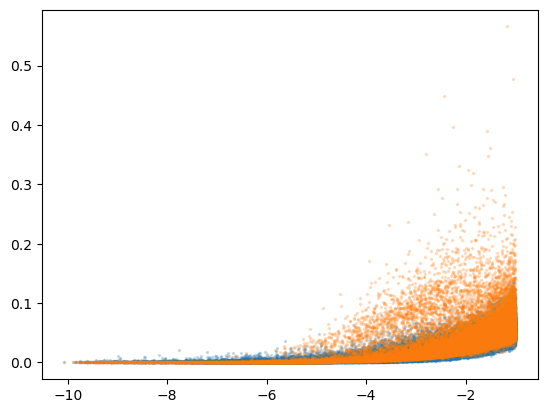

In [17]:
mask=cat['delta_r']<1e20
plt.figure()
plt.scatter(cat['delta_i'],sigma_sim_r, s=2, alpha=0.2)
plt.scatter(cat['delta_i'][mask],cat['i_cModelMagErr'][mask], s=2, alpha=0.2)
plt.show()

## 4. **Test: Attribute LSST DP1-like errors to a catalog**